## Bike Lane Data

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import datetime as dt
from shapely.geometry import Polygon, LineString, Point
from geopandas.tools import sjoin

In [2]:
def to_latlongcrs(gpd_file):
    """
    checks if gpd_file is in Geographic 2D CRS: EPSG: 4326.  
    If not, returns converted file
    
    Args: gpd_file (GeoDataFrame)
    Returns: gpd_file (GeoDataFrame in EPSG: 4326)
    """
#     print(gpd_file.crs.to_string())
    if gpd_file.crs.to_string()[-4:] != '4326':
#         print('file converted.')
        gpd_file.to_crs("EPSG:4326",inplace=True)
    else:
        pass
    return gpd_file

### Load data

In [3]:
#### Load Shapefile data
## Load bikelanes
data_2017_o = gpd.read_file('Bicycle_Routes_2017')
data_2018_o = gpd.read_file('Bicycle_Routes_2018')
data_2019_o = gpd.read_file('Bicycle_Routes_2019')
data_2020_o = gpd.read_file('Bicycle_Routes_2020')
data_2021_o = gpd.read_file('Bicycle_Routes_2021')

## Load NYC Zip code - https://data.cityofnewyork.us/Business/
# Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true
zip_codes = gpd.read_file('ZIP_CODE')

## VZ Priority areas
vz_areas = gpd.read_file('VZV_Bike Priority Areas')

In [46]:
vz_areas

,boro_cd_co,shape_area,shape_leng,geometry
0,BK 3,7.946098e+07,36213.836246,"POLYGON ((-73.91712 40.68257, -73.91698 40.681..."
1,BK 5,1.562042e+08,58026.457589,"POLYGON ((-73.86096 40.65518, -73.86059 40.654..."
2,BK 12,9.983319e+07,52468.911374,"POLYGON ((-73.97032 40.64454, -73.97009 40.643..."
3,BK 14,8.216872e+07,49259.561735,"POLYGON ((-73.94454 40.62987, -73.94416 40.629..."
4,BK 15,1.316788e+08,96010.937353,"POLYGON ((-73.91831 40.58644, -73.91833 40.586..."
5,BK 17,9.379138e+07,43287.261876,"POLYGON ((-73.90805 40.65161, -73.90755 40.651..."
6,QN 3,8.297560e+07,37011.014197,"POLYGON ((-73.85234 40.75789, -73.85226 40.757..."
7,QN 4,6.563490e+07,36820.752039,"POLYGON ((-73.84892 40.74039, -73.84796 40.740..."
8,QN 5,2.104168e+08,69923.950054,"POLYGON ((-73.85544 40.70349, -73.85539 40.703..."
9,BK 4,5.666039e+07,37060.916646,"POLYGON ((-73.91068 40.70105, -73.91181 40.699..."


In [4]:
## Replace Boro numbers with names in data files

boro_legend = {
    1.0: 'Manhattan', 
    2.0: 'Bronx', 
    3.0: 'Brooklyn', 
    4.0: 'Queens', 
    5.0: 'Staten Island'}

# Replace
data_2017_o['boro'] = data_2017_o['boro'].replace(boro_legend)
data_2018_o['boro'] = data_2018_o['boro'].replace(boro_legend)
data_2019_o['boro'] = data_2019_o['boro'].replace(boro_legend)
data_2020_o['boro'] = data_2020_o['boro'].replace(boro_legend)
data_2021_o['boro'] = data_2021_o['boro'].replace(boro_legend)

In [7]:
### Convert files to Lat-long
data_2017 = to_latlongcrs(data_2017_o)
data_2018 = to_latlongcrs(data_2018_o)
data_2019 = to_latlongcrs(data_2019_o)
data_2020 = to_latlongcrs(data_2020_o)
data_2021 = to_latlongcrs(data_2021_o)
zip_codes = to_latlongcrs(zip_codes)

In [8]:
# type(data_2020['instdate']), create 'year' column for all bike lanes
data_2020['year'] = pd.DatetimeIndex(data_2020['instdate']).year
data_2019['year'] = pd.DatetimeIndex(data_2019['date_instd']).year
data_2018['year'] = pd.DatetimeIndex(data_2018['instdate']).year
data_2017['year'] = pd.DatetimeIndex(data_2017['instdate']).year

In [15]:
## Add zip_codes to density
zip_codes['density'] = zip_codes['POPULATION']/zip_codes['AREA']
zip_density_table = zip_codes['POPULATION']/zip_codes['AREA']

### Find length and centroids of segments BEFORE joining tables

In [25]:
## Find lengths and centroids of bike lanes added

# allframes['length'] = allframes['geometry'].to_crs("EPSG:2263").length
# allframes['centroid'] = allframes['geometry'].to_crs("EPSG:2263").centroid

## Same as above but by individual year
data_2017['length'] = data_2017['geometry'].to_crs("EPSG:2263").length
data_2017['centroid'] = data_2017['geometry'].centroid
data_2018['length'] = data_2018['geometry'].to_crs("EPSG:2263").length
data_2018['centroid'] = data_2018['geometry'].centroid
data_2019['length'] = data_2019['geometry'].to_crs("EPSG:2263").length
data_2019['centroid'] = data_2019['geometry'].centroid
data_2020['length'] = data_2020['geometry'].to_crs("EPSG:2263").length
data_2020['centroid'] = data_2020['geometry'].centroid



/var/folders/b8/239_pqws18g3pvdbw2lfwk600000gn/T/ipykernel_97142/393670235.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_2017['centroid'] = data_2017['geometry'].centroid
/var/folders/b8/239_pqws18g3pvdbw2lfwk600000gn/T/ipykernel_97142/393670235.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_2018['centroid'] = data_2018['geometry'].centroid
/var/folders/b8/239_pqws18g3pvdbw2lfwk600000gn/T/ipykernel_97142/393670235.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_2019['centroid'] = data_2019['geometry'].centroid
/var/folders/b8/239_pqws18g3p

### Sjoin to get zipcode

In [28]:
## Merge the bike data with the zip-codes
lanes_2021 = sjoin(data_2021, zip_codes, how = 'left')
lanes_2020 = sjoin(data_2020, zip_codes, how = 'left')
lanes_2019 = sjoin(data_2019, zip_codes, how = 'left')
lanes_2018 = sjoin(data_2018, zip_codes, how = 'left')
lanes_2017 = sjoin(data_2017, zip_codes, how = 'left')

In [226]:
# ### DELET THIS AND USE 2020 filtered by year instead as below

# ## Get the bikelanes installed specifically in the previous year
# data_2017_prev_yr = lanes_2017[lanes_2017['year'] == 2016]
# # print(data_2017_prev_yr.shape)    #(1125, 30)
# data_2018_prev_yr = lanes_2018[lanes_2018['year'] == 2017]
# # print(data_2018_prev_yr.shape)    #(1002, 37)
# data_2019_prev_yr = lanes_2019[lanes_2019['year'] == 2018]
# # print(data_2019_prev_yr.shape)    #(780, 32)
# data_2020_prev_yr = lanes_2020[lanes_2020['year'] == 2019]
# # print(data_2020_prev_yr.shape)    #(1256, 30)

### Bikelanes by year

In [51]:
## Get the bikelanes installed specifically in the previous year
data_2017_prev_yr = lanes_2020[lanes_2020['year'] == 2016]
# print(data_2017_prev_yr.shape)    #(1125, 30)
data_2018_prev_yr = lanes_2020[lanes_2020['year'] == 2017]
# print(data_2018_prev_yr.shape)    #(1002, 37)
data_2019_prev_yr = lanes_2020[lanes_2020['year'] == 2018]
# print(data_2019_prev_yr.shape)    #(780, 32)
data_2020_prev_yr = lanes_2020[lanes_2020['year'] == 2019]
# print(data_2020_prev_yr.shape)    #(1256, 30)
lanes_pre_2015 = lanes_2020[lanes_2020['year'] < 2016]
lanes_post_vz = lanes_2020[lanes_2020['year'] > 2016]

#### I HAVE NO IDEA WHAT THIS IS FOR 

In [227]:
## Create new column called Accident Count and set all values 1
bike_data_or_trimmed.columns
bike_data_or_trimmed["Accident Count"] = 1
# Create Date column that combines YEAR and MONTH
bike_data_or_trimmed['Date'] = pd.to_datetime(bike_data_or_trimmed[['YEAR', 'MONTH']].assign(Day=1))

## Aggregate by month and year and count accidents
df_  = bike_data_or_trimmed.groupby(['YEAR','MONTH']).agg({"Accident Count":"sum"}).reset_index()
df_['Date'] = pd.to_datetime(df_[['YEAR', 'MONTH']].assign(Day=1))

# Create lineplot
g = sns.lineplot(data=df_, x="Date", y="Accident Count")

NameError: name 'bike_data_or_trimmed' is not defined

### plot lanes on zipcodes

In [44]:
zip_codes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,density
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.80585 40.68291, -73.80569 40.682...",0.000823
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.93740 40.67973, -73.93487 40.679...",0.002107
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.90294 40.67084, -73.90223 40.668...",0.001998
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.95797 40.67066, -73.95576 40.670...",0.002385
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208 40.65060, -73.97192 40.650...",0.001960


<AxesSubplot:>

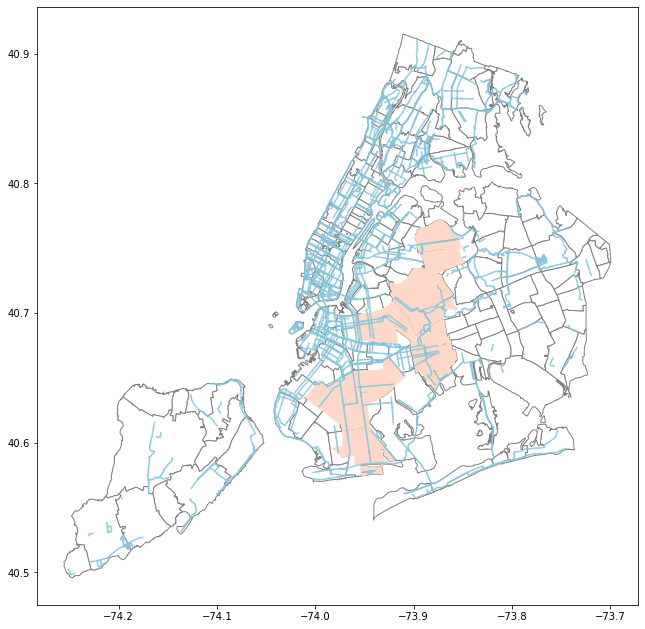

In [47]:
# Pre - 2016
# 2015 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (11, 11))
lanes_pre_2015.plot(ax=ax, color='#86C5DB')
vz_areas.plot(ax=ax, color='#FED9C9')

<AxesSubplot:>

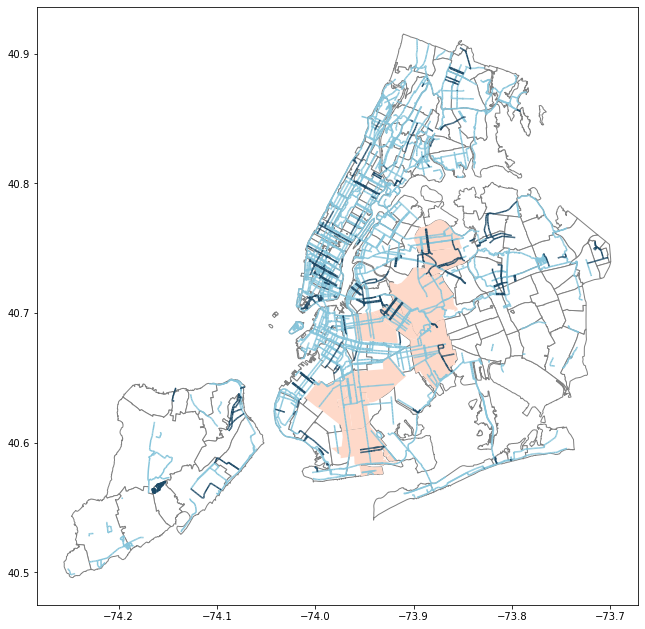

In [55]:
# Pre - 2016
# 2015 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (11, 11))
lanes_pre_2015.plot(ax=ax, color='#86C5DB')
data_2017_prev_yr.plot(ax=ax, color='#86C5DB')
lanes_post_vz.plot(ax=ax, color='#1c4966')    #lanes added 2017-present
vz_areas.plot(ax=ax, color='#FED9C9')     #Vision Zero Bike priority areas

<AxesSubplot:>

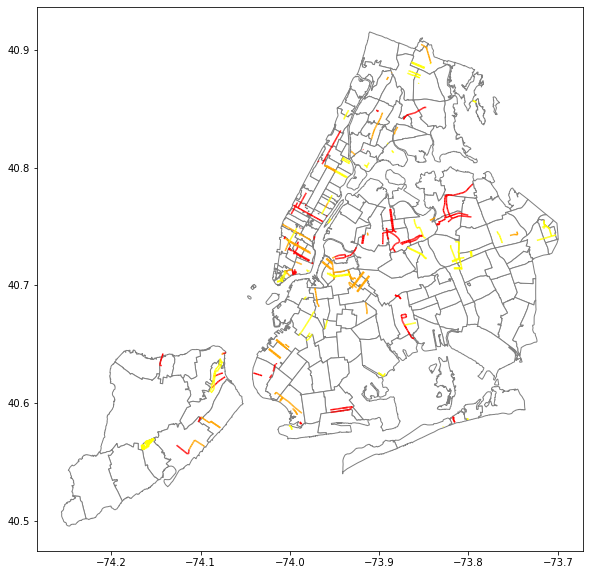

In [145]:
# 2015 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (10, 10))
data_2020_prev_yr.plot(ax=ax, color='blue')
data_2019_prev_yr.plot(ax=ax, color='orange')
data_2018_prev_yr.plot(ax=ax, color='yellow')

<AxesSubplot:>

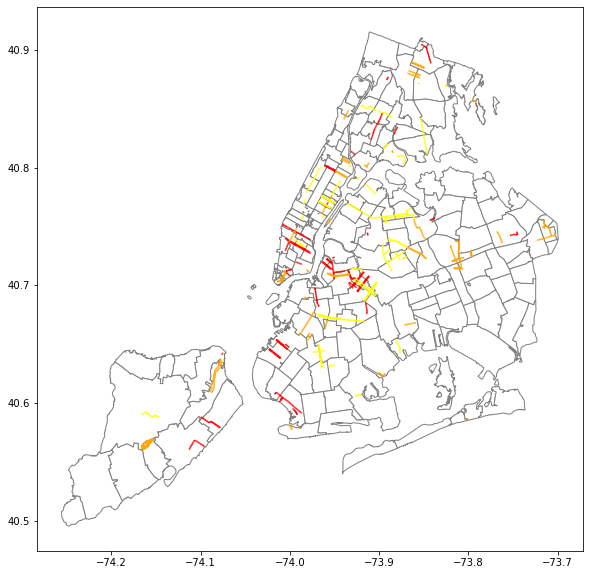

In [146]:
# 2018 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (10, 10))
data_2019_prev_yr.plot(ax=ax, color='red')
data_2018_prev_yr.plot(ax=ax, color='orange')
data_2017_prev_yr.plot(ax=ax, color='yellow')

In [186]:
allframes.sort_values('length')
# allframes.loc[2095,'geometry'].plot()
graph = allframes[allframes[‘length’]>3000]


SyntaxError: invalid character in identifier (1645129613.py, line 3)

In [ ]:
# 2017 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (10, 10))
data_2018_prev_yr.plot(ax=ax, color='red')


<AxesSubplot:>

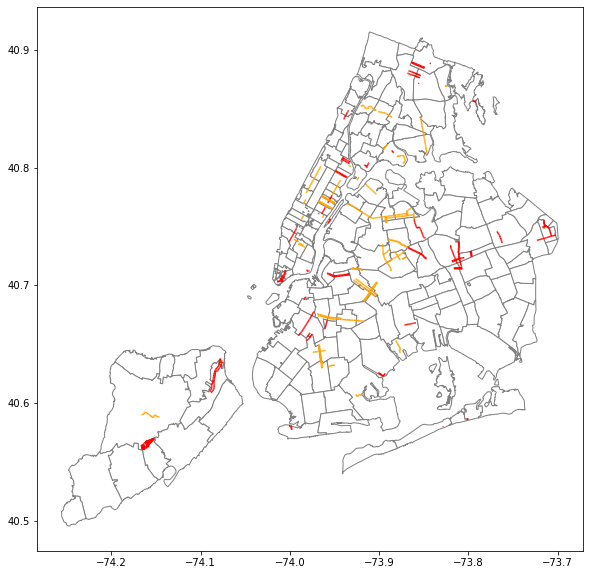

In [147]:
# 2017 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (10, 10))
data_2018_prev_yr.plot(ax=ax, color='red')
data_2017_prev_yr.plot(ax=ax, color='orange')
# minx, miny, maxx, maxy = near_evil_zips.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

<AxesSubplot:>

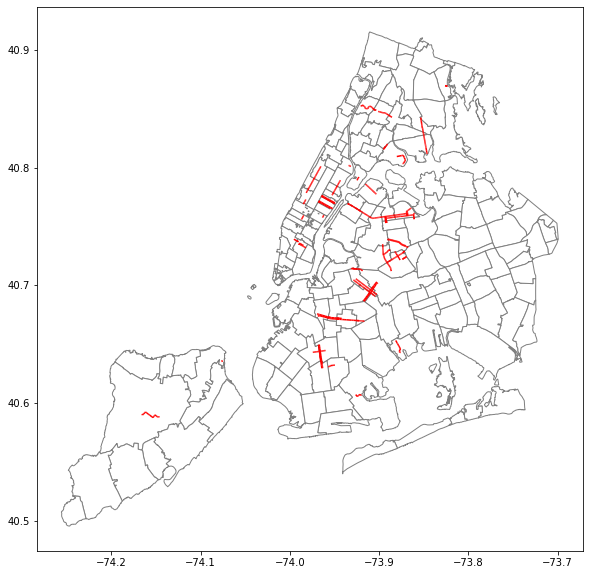

In [148]:
# 2016 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (10, 10))
data_2017_prev_yr.plot(ax=ax, color='red')

In [163]:
col_names = ['boro',
    'instdate', 
    'moddate', 
    'comments', 
    'geometry', 
    'year',
    'index_right',
    'ZIPCODE', 
    'PO_NAME', 
    'POPULATION', 
    'AREA',
    'SHAPE_AREA', 
    'SHAPE_LEN']
data_2017_trimmed = data_2017_prev_yr[col_names]
data_2018_trimmed = data_2018_prev_yr[col_names]
data_2020_trimmed = data_2020_prev_yr[col_names]

col_names2 = ['boro',
    'date_instd', 
    'date_modda', 
    'comments', 
    'geometry', 
    'year',
    'index_right',
    'ZIPCODE', 
    'PO_NAME', 
    'POPULATION', 
    'AREA',
    'SHAPE_AREA', 
    'SHAPE_LEN']

data_2019_trimmed = data_2019_prev_yr[col_names2]
data_2019_trimmed.rename(columns={'date_instd': 'instdate', 'date_modda':'moddate'}, inplace=True)
data_2019_trimmed.columns

/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['boro', 'instdate', 'moddate', 'comments', 'geometry', 'year',
       'index_right', 'ZIPCODE', 'PO_NAME', 'POPULATION', 'AREA', 'SHAPE_AREA',
       'SHAPE_LEN'],
      dtype='object')

In [165]:
# Number of points where the mod date is different than creation date
data_2017_trimmed[data_2017_trimmed['instdate'] != data_2017_trimmed['moddate']].shape #45
data_2018_trimmed[data_2018_trimmed['instdate'] != data_2018_trimmed['moddate']] #38
data_2019_trimmed[data_2019_trimmed['instdate'] != data_2019_trimmed['moddate']] #45
data_2020_trimmed[data_2020_trimmed['instdate'] != data_2020_trimmed['moddate']] #0


,boro,instdate,moddate,comments,geometry,year,index_right,ZIPCODE,PO_NAME,POPULATION,AREA,SHAPE_AREA,SHAPE_LEN


In [166]:
## Unnecessary because we can just use 2020 data and filter for vision zero days
dataframeslist = [data_2017_trimmed, data_2018_trimmed, data_2019_trimmed, data_2020_trimmed]
allframes = gpd.GeoDataFrame(pd.concat(dataframeslist, ignore_index=True))
allframes.shape

(4163, 13)

### Delete next two because unnecessary

In [167]:
## Find lengths and centroids of bike lanes added

allframes['length'] = allframes['geometry'].to_crs("EPSG:2263").length
allframes['centroid'] = allframes['geometry'].to_crs("EPSG:2263").centroid

In [168]:
## Find lengths and centroids of bike lanes added

# allframes['length'] = allframes['geometry'].to_crs("EPSG:2263").length
# allframes['centroid'] = allframes['geometry'].to_crs("EPSG:2263").centroid

## Same as above but by individual year
data_2017_trimmed['length'] = data_2017_trimmed['geometry'].to_crs("EPSG:2263").length
data_2017_trimmed['centroid'] = data_2017_trimmed['geometry'].to_crs("EPSG:2263").centroid
data_2018_trimmed['length'] = data_2018_trimmed['geometry'].to_crs("EPSG:2263").length
data_2018_trimmed['centroid'] = data_2018_trimmed['geometry'].to_crs("EPSG:2263").centroid
data_2019_trimmed['length'] = data_2019_trimmed['geometry'].to_crs("EPSG:2263").length
data_2019_trimmed['centroid'] = data_2019_trimmed['geometry'].to_crs("EPSG:2263").centroid
data_2020_trimmed['length'] = data_2020_trimmed['geometry'].to_crs("EPSG:2263").length
data_2020_trimmed['centroid'] = data_2020_trimmed['geometry'].to_crs("EPSG:2263").centroid


/Users/julie/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


### Find sums for each year

In [173]:
tot_17 = data_2017_trimmed.agg({'length':'sum'}).round(2)
tot_18 = data_2018_trimmed.agg({'length':'sum'}).round(2)
tot_19 = data_2019_trimmed.agg({'length':'sum'}).round(2)
tot_20 = data_2020_trimmed.agg({'length':'sum'}).round(2)
print(tot_17, tot_18, tot_19, tot_20)
allframes.groupby('year').agg({'length':'sum'}).round(2).

length    278315.28
dtype: float64 length    256880.7
dtype: float64 length    223055.35
dtype: float64 length    269855.85
dtype: float64


,length
year,
2016,278315.28
2017,256880.70
2018,223055.35
2019,269855.85


### Find zipcodes with work

In [105]:
data_2017_trimmed.columns

Index(['boro', 'instdate', 'moddate', 'comments', 'geometry', 'year',
       'index_right', 'ZIPCODE', 'PO_NAME', 'POPULATION', 'AREA', 'SHAPE_AREA',
       'SHAPE_LEN', 'length', 'centroid'],
      dtype='object')

In [188]:
data_2017['boro']

0        1.0
1        3.0
2        3.0
3        1.0
4        3.0
        ... 
14975    3.0
14976    3.0
14977    3.0
14978    3.0
14979    3.0
Name: boro, Length: 14980, dtype: float64

In [171]:
## Find total length and centroid
lanes_zip_17 = data_2017_trimmed.groupby(['ZIPCODE']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_zip_18 = data_2018_trimmed.groupby(['ZIPCODE']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_zip_19 = data_2019_trimmed.groupby(['ZIPCODE']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_zip_20 = data_2020_trimmed.groupby(['ZIPCODE']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)

lanes_boro_17 = data_2017_trimmed.groupby(['boro']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_boro_18 = data_2018_trimmed.groupby(['boro']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_boro_19 = data_2019_trimmed.groupby(['boro']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)
lanes_boro_20 = data_2020_trimmed.groupby(['boro']).agg({'length':'sum'}).round(2).sort_values(by='length', ascending=False)


In [131]:
allframes[allframes['year'] == 2017]

,boro,instdate,moddate,comments,geometry,year,index_right,ZIPCODE,PO_NAME,POPULATION,AREA,SHAPE_AREA,SHAPE_LEN,length,centroid
1125,4.0,2017-12-11,2017-12-11,None,"LINESTRING (-73.86826 40.73249, -73.86794 40.7...",2017,167.0,11374,Rego Park,42755.0,2.520356e+07,0.0,0.0,108.733403,POINT (1020805.705 206137.987)
1126,4.0,2017-12-11,2017-12-11,None,"LINESTRING (-73.86765 40.73258, -73.86742 40.7...",2017,167.0,11374,Rego Park,42755.0,2.520356e+07,0.0,0.0,78.536320,POINT (1020961.481 206181.030)
1127,4.0,2017-12-11,2017-12-11,None,"LINESTRING (-73.86781 40.73267, -73.86765 40.7...",2017,167.0,11374,Rego Park,42755.0,2.520356e+07,0.0,0.0,54.281074,POINT (1020907.939 206220.316)
1128,1.0,2017-06-15,2017-06-15,contra-flow,"LINESTRING (-73.98864 40.74281, -73.98915 40.7...",2017,87.0,10010,New York,29881.0,9.768396e+06,0.0,0.0,161.788570,POINT (987325.953 209943.353)
1129,1.0,2017-06-15,2017-06-15,None,"LINESTRING (-73.98901 40.74232, -73.98864 40.7...",2017,87.0,10010,New York,29881.0,9.768396e+06,0.0,0.0,207.154535,POINT (987346.170 209813.601)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,5.0,2017-12-12,2017-12-12,None,"LINESTRING (-74.16097 40.56711, -74.16094 40.5...",2017,153.0,10308,Staten Island,27612.0,6.275104e+07,0.0,0.0,656.378714,POINT (939723.744 145764.230)
2123,5.0,2017-12-12,2017-12-12,None,"LINESTRING (-74.15875 40.56684, -74.15874 40.5...",2017,153.0,10308,Staten Island,27612.0,6.275104e+07,0.0,0.0,1452.686189,POINT (940772.237 145939.740)
2124,5.0,2017-12-12,2017-12-12,None,"LINESTRING (-74.16097 40.56711, -74.16096 40.5...",2017,153.0,10308,Staten Island,27612.0,6.275104e+07,0.0,0.0,1942.658400,POINT (940447.956 146131.981)
2125,5.0,2017-12-12,2017-12-12,None,"LINESTRING (-74.16197 40.56337, -74.16201 40.5...",2017,153.0,10308,Staten Island,27612.0,6.275104e+07,0.0,0.0,288.888575,POINT (939133.353 144633.750)


In [174]:
## Table of lengths for all added lanes
allframes.sort_values(by='year').groupby(['year', 'boro']).agg({'length':'sum'}).round(2)

length
year boro           
2016 1.0    49257.67
     2.0    34368.90
     3.0    90753.68
     4.0    96156.26
     5.0     7778.78
2017 1.0    46085.36
     2.0    26023.17
     3.0    43698.20
     4.0    84527.38
     5.0    56546.59
2018 1.0    54957.55
     2.0    22194.55
     3.0   120668.19
     4.0     6328.02
     5.0    18907.05
2019 1.0    65436.34
     2.0    11256.53
     3.0    53200.14
     4.0   118016.42
     5.0    21946.42

## bike lanes + danger zipcodes

<AxesSubplot:>

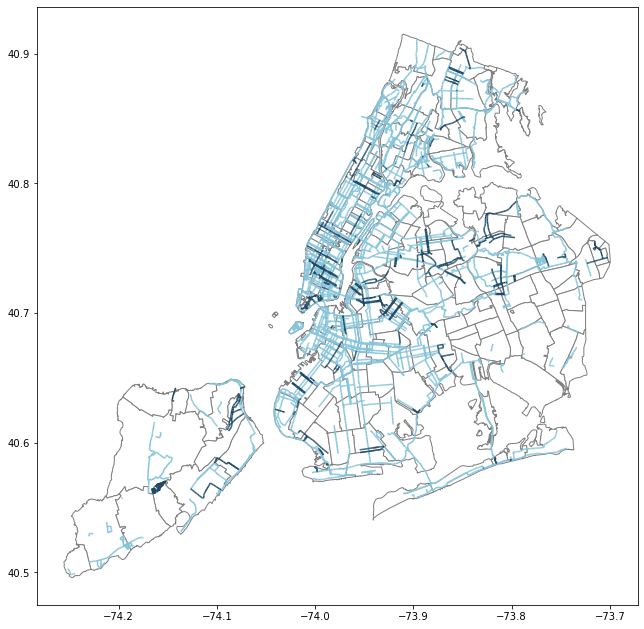

In [56]:
# Pre - 2016
# 2015 additions
ax = zip_codes.plot(color='white', edgecolor='gray', figsize= (11, 11))
lanes_pre_2015.plot(ax=ax, color='#86C5DB')
data_2017_prev_yr.plot(ax=ax, color='#86C5DB')
lanes_post_vz.plot(ax=ax, color='#1c4966')    #lanes added 2017-present
# vz_areas.plot(ax=ax, color='#FED9C9')     #Vision Zero Bike priority areas